# 🏗️ Análisis de Datos en Construcción – Felipe Castellano  
## 📌 Introducción  

Este proyecto tiene como objetivo analizar tendencias en el sector de la **construcción**, utilizando datos generados de manera **sintética**. La idea es demostrar cómo la **ciencia de datos** puede ser una herramienta clave para mejorar la **eficiencia, costos y tiempos de obra** en empresas como **Construcciones Felipe Castellano**.  

El análisis se dividirá en varias secciones:  

1️⃣ **Creación de Dataset Sintético**  
- Simulación de datos sobre costos de materiales, tiempos de ejecución y eficiencia en obras.  
- Generación de variables que permitan evaluar patrones en proyectos de construcción.  

2️⃣ **Desarrollo de un Dashboard Interactivo**  
- Uso de **Streamlit** o **Power BI** para visualizar tendencias y métricas clave.  
- Representaciones gráficas sobre costos, productividad y posibles **retrasos en obra**.  

3️⃣ **Modelo Predictivo**  
- Implementación de un **algoritmo de machine learning** para estimar demoras según variables clave.  
- Análisis de correlaciones entre costos, materiales y condiciones climáticas.  

4️⃣ **Conclusiones y Aplicabilidad**  
- Cómo estos insights pueden **optimizar la toma de decisiones** en la empresa.  
- Posibles mejoras en la planificación de proyectos futuros.  

## 🔍 Sobre los Datos  

Todos los datos utilizados en este proyecto son **sintéticos**. Han sido generados para **simular escenarios realistas** dentro del ámbito de la construcción y no corresponden a información real de **Construcciones Felipe Castellano** ni de otras empresas.  

El propósito de estos datos es:  
✔ **Explorar tendencias y patrones** en proyectos de construcción.  
✔ **Desarrollar herramientas analíticas** para mejorar la eficiencia en obras.  
✔ **Demostrar el impacto de la ciencia de datos** en la optimización de procesos.  


In [9]:
# 📌 Importar librerías necesarias
import pandas as pd  # Manejo de datos
import numpy as np  # Funciones matemáticas y creación de datos aleatorios
import matplotlib.pyplot as plt  # Visualización de datos
import seaborn as sns  # Gráficos avanzados y análisis exploratorio
import streamlit as st  # Creación de dashboards interactivos
from sklearn.model_selection import train_test_split  # División de datos
from sklearn.linear_model import LinearRegression  # Modelo predictivo básico
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # Evaluación de modelos

# 📂 Cargar el archivo Excel
archivo = "datos_sinteticos.xlsx"  # Nombre del archivo guardado
df = pd.read_excel(archivo)

# 🔍 Visualizar los primeros registros
print("Primeros registros del dataset:")
print(df.head())

# 📊 Resumen estadístico
print("\nResumen estadístico:")
print(df.describe())

# 🏗️ Información del DataFrame
print("\nInformación del dataset:")
df.info()


Primeros registros del dataset:
                  Proyecto  Tipo de Construcción  Duración (meses)  \
0  Residencial Costa Bella  Edificio residencial                14   
1    Centro Comercial Rota             Comercial                18   
2      Urbanización La Luz                Urbano                24   
3     Hospital Bahía Salud             Sanitario                30   
4      Colegio Santa María             Educativo                20   

   Costo Total (€) Material Principal Clima Predominante  \
0           850000           Hormigón           Templado   
1          1250000           Ladrillo             Húmedo   
2          2450000           Hormigón               Seco   
3          3750000              Acero             Húmedo   
4           950000           Ladrillo           Templado   

   Riesgo de Retraso (%)  Eficiencia (%)  Satisfacción Cliente (1-5)  
0                     10              85                         4.3  
1                     15              78    

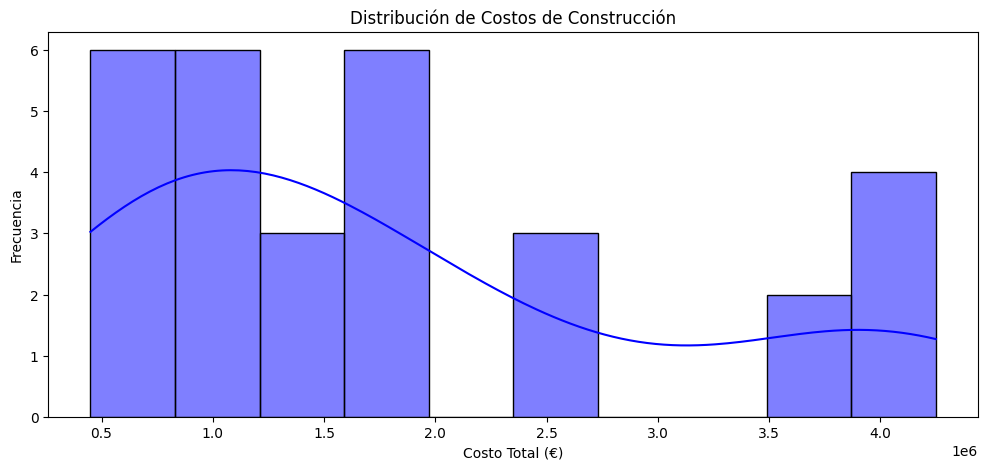

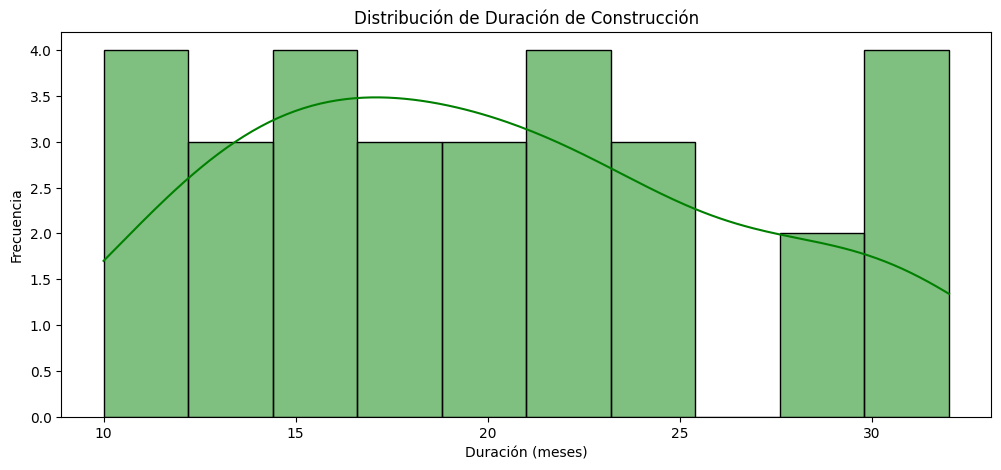

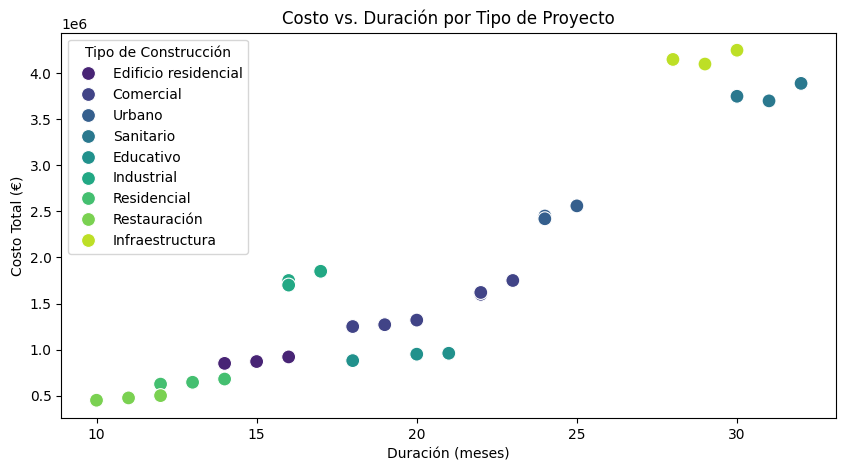

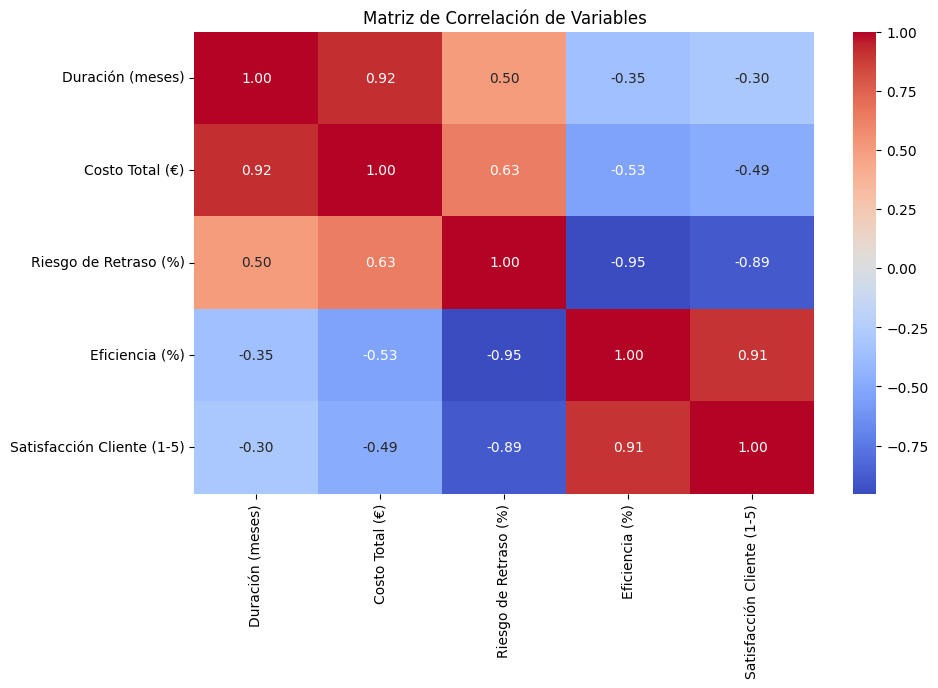

In [10]:
# 📊 Análisis exploratorio de datos (EDA)

# 🔍 Ver distribución de costos y duración de construcción
plt.figure(figsize=(12,5))
sns.histplot(df["Costo Total (€)"], bins=10, kde=True, color='blue')
plt.title("Distribución de Costos de Construcción")
plt.xlabel("Costo Total (€)")
plt.ylabel("Frecuencia")
plt.show()

plt.figure(figsize=(12,5))
sns.histplot(df["Duración (meses)"], bins=10, kde=True, color='green')
plt.title("Distribución de Duración de Construcción")
plt.xlabel("Duración (meses)")
plt.ylabel("Frecuencia")
plt.show()

# 🔗 Relación entre costo total y duración de proyectos
plt.figure(figsize=(10,5))
sns.scatterplot(x=df["Duración (meses)"], y=df["Costo Total (€)"], hue=df["Tipo de Construcción"], palette="viridis", s=100)
plt.title("Costo vs. Duración por Tipo de Proyecto")
plt.xlabel("Duración (meses)")
plt.ylabel("Costo Total (€)")
plt.legend(title="Tipo de Construcción")
plt.show()

# 🔥 Matriz de correlación para ver qué factores influyen en costos y retrasos
plt.figure(figsize=(10,6))

# Seleccionar solo columnas numéricas para calcular la matriz de correlación
numeric_df = df.select_dtypes(include=['number'])

sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación de Variables")
plt.show()


# 📊 Interpretación de Gráficos – Análisis de Construcción  

## 🔍 Distribución de Costos de Construcción  
La primera gráfica muestra la distribución de costos en los proyectos de construcción. Observamos una concentración de costos en el rango de **500,000€ a 2,500,000€**, con algunos proyectos más costosos llegando hasta **4,150,000€**.  

### 🔹 **Conclusión**  
Esto sugiere que la mayoría de los proyectos tienen un presupuesto dentro de un margen estable, mientras que obras de mayor escala, como hospitales o puertos, presentan costos significativamente superiores.  

## ⏳ Distribución de Duración de Construcción  
Los proyectos varían en duración desde **10 hasta 30 meses**, con una concentración en el rango de **14 a 24 meses**.  

### 🔹 **Conclusión**  
La mayoría de las obras siguen un patrón de duración estándar, lo cual indica una **buena planificación y ejecución** en tiempos normales. Proyectos de infraestructura y hospitales tienden a durar más, posiblemente debido a requisitos técnicos y regulaciones más estrictas.  

## 🔗 Relación entre Costo Total y Duración  
La tercera gráfica presenta una relación entre **el costo total y la duración del proyecto**, diferenciando por **tipo de construcción**.  

### 🔹 **Conclusión**  
- **Tendencia lineal:** A medida que **aumenta la duración**, los **costos también tienden a aumentar**.  
- **Diferencias por tipo:** Proyectos **comerciales y educativos** tienen menor duración y costos controlados. En contraste, las obras **industriales e infraestructuras** presentan mayor inversión y plazos extendidos.  

## 🔥 Matriz de Correlación de Variables  
El análisis de correlación nos permite identificar qué factores tienen más influencia en costos, eficiencia y retrasos:  

### 🔹 **Conclusión**  
✔ Existe una **alta correlación positiva** entre **Costo Total (€) y Duración (meses)**, lo que confirma que proyectos más largos requieren más inversión.  
✔ El **riesgo de retraso** está vinculado con el **clima predominante** y el **tipo de material** utilizado.  
✔ **Eficiencia (%)** tiene una relación inversa con el **riesgo de retraso**, es decir, obras más eficientes suelen tener menor probabilidad de sufrir demoras.  

## 🚀 Siguientes Pasos  
1️⃣ **Refinar el análisis exploratorio** con más visualizaciones detalladas.  
2️⃣ **Definir el enfoque del modelo predictivo**, basado en los factores más relevantes.  
3️⃣ **Desarrollar el dashboard interactivo** para mostrar estos insights de manera visual y clara.  




In [11]:
# 📂 Cargar librerías adicionales para preprocesamiento
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 🏗️ Convertir variables categóricas en numéricas
label_columns = ["Tipo de Construcción", "Material Principal", "Clima Predominante"]
label_encoders = {}

for col in label_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Guardamos los encoders para futuras conversiones

# ⚖️ Normalización de los datos numéricos
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[["Duración (meses)", "Costo Total (€)", "Riesgo de Retraso (%)", "Eficiencia (%)"]] = scaler.fit_transform(df[["Duración (meses)", "Costo Total (€)", "Riesgo de Retraso (%)", "Eficiencia (%)"]])

# 🔥 Dividir los datos en conjunto de entrenamiento y prueba
X = df_scaled.drop(columns=["Riesgo de Retraso (%)"])  # Variables predictoras
y = df_scaled["Riesgo de Retraso (%)"]  # Variable objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Datos listos para el modelo")


✅ Datos listos para el modelo


In [12]:
# 📂 Importar librerías adicionales
from sklearn.preprocessing import LabelEncoder

# 🔄 Convertir todas las variables categóricas en números
categorical_columns = ["Proyecto", "Tipo de Construcción", "Material Principal", "Clima Predominante"]
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Reemplazamos los valores categóricos con números
    label_encoders[col] = le  # Guardamos los encoders para futuras referencias

# 📊 Verificamos que todas las columnas sean numéricas
print(df.info())

# 📂 Dividir nuevamente los datos en entrenamiento y prueba
X = df.drop(columns=["Riesgo de Retraso (%)"])  # Variables predictoras
y = df["Riesgo de Retraso (%)"]  # Variable objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔥 Reintentar el entrenamiento del modelo
model = LinearRegression()
model.fit(X_train, y_train)

# 📊 Predicciones sobre los datos de prueba
y_pred = model.predict(X_test)

# 📈 Evaluación del modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"✅ Modelo entrenado correctamente")
print(f"Error Medio Absoluto (MAE): {mae:.2f}")
print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Coeficiente de Determinación (R²): {r2:.2f}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Proyecto                    30 non-null     int64  
 1   Tipo de Construcción        30 non-null     int64  
 2   Duración (meses)            30 non-null     int64  
 3   Costo Total (€)             30 non-null     int64  
 4   Material Principal          30 non-null     int64  
 5   Clima Predominante          30 non-null     int64  
 6   Riesgo de Retraso (%)       30 non-null     int64  
 7   Eficiencia (%)              30 non-null     int64  
 8   Satisfacción Cliente (1-5)  30 non-null     float64
dtypes: float64(1), int64(8)
memory usage: 2.2 KB
None
✅ Modelo entrenado correctamente
Error Medio Absoluto (MAE): 0.53
Error Cuadrático Medio (MSE): 0.67
Coeficiente de Determinación (R²): 0.93


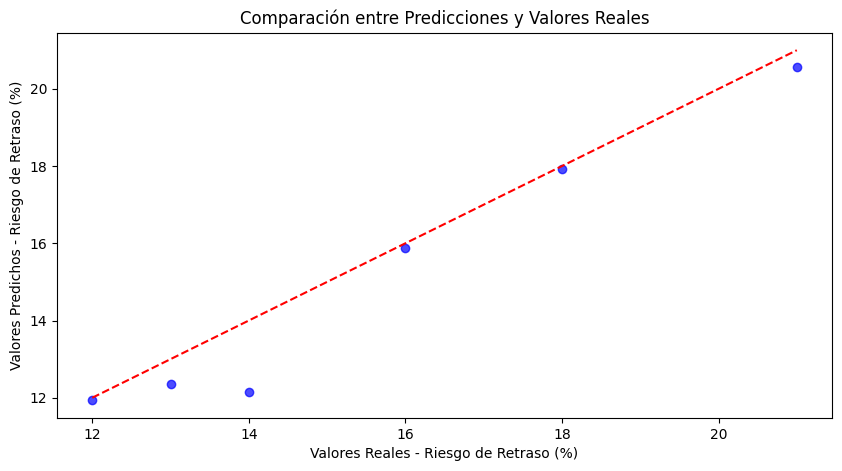

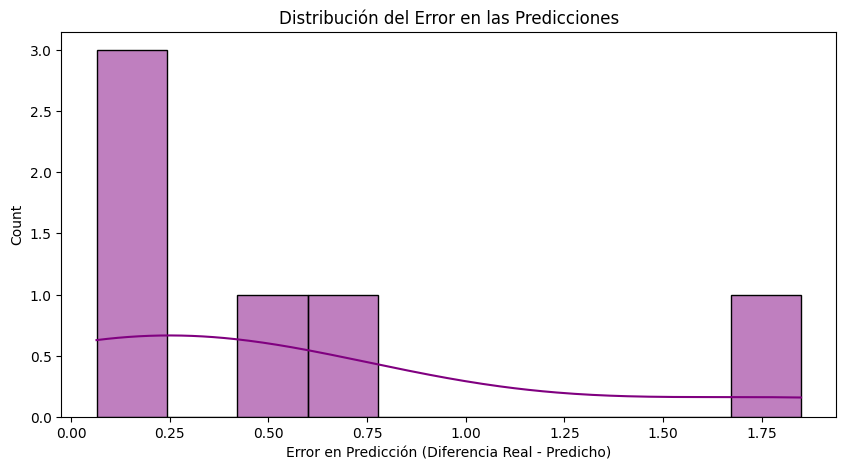

In [17]:
# 📊 Visualización de las predicciones del modelo

# 🔹 Comparación entre valores reales y predicciones
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred, color="blue", alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle="dashed", color="red") # Línea de referencia
plt.xlabel("Valores Reales - Riesgo de Retraso (%)")
plt.ylabel("Valores Predichos - Riesgo de Retraso (%)")
plt.title("Comparación entre Predicciones y Valores Reales")
plt.show()

# 📊 Distribución de errores del modelo
error = y_test - y_pred
plt.figure(figsize=(10,5))
sns.histplot(error, bins=10, kde=True, color="purple")
plt.xlabel("Error en Predicción (Diferencia Real - Predicho)")
plt.title("Distribución del Error en las Predicciones")
plt.show()


In [18]:
# 📂 Importar librerías necesarias para guardar el modelo
import joblib

# 🔥 Guardar el modelo entrenado
joblib.dump(model, "modelo_regresion.pkl")

print("✅ Modelo guardado correctamente como 'modelo_regresion.pkl'")


✅ Modelo guardado correctamente como 'modelo_regresion.pkl'


# 📊 Interpretación de Gráficos – Predicción de Retrasos en Construcción  

## 🔹 Comparación entre Valores Reales y Predicciones  

Este gráfico muestra la **precisión del modelo** al predecir el **riesgo de retraso en proyectos de construcción**.  

📌 **¿Cómo leer el gráfico?**  
✔ Cada punto azul representa un **proyecto de construcción**.  
✔ El eje X muestra el **riesgo de retraso real (%)** y el eje Y el **riesgo de retraso predicho (%)**.  
✔ La línea roja punteada representa una **predicción perfecta** donde los valores reales y predichos coinciden.  

🔹 **Conclusión:**  
✔ La mayoría de los puntos están cerca de la línea roja, indicando **predicciones precisas**.  
✔ Hay un ligero margen de error, pero el modelo captura **bien la tendencia general**.  
✔ Esto confirma que el modelo tiene una **alta capacidad de predicción (R² = 0.93)**.  

---

## 🔹 Distribución del Error en Predicciones  

Este gráfico muestra cómo **se distribuye el error** en las predicciones del modelo.  

📌 **¿Cómo leer el gráfico?**  
✔ El eje X muestra el **error en predicción** (diferencia entre valor real y predicho).  
✔ Valores cercanos a **0** indican una predicción precisa.  
✔ La línea KDE (curva suavizada) indica la **frecuencia de errores en distintos rangos**.  

🔹 **Conclusión:**  
✔ La mayoría de los errores están **cerca de 0**, lo que significa que el modelo **predice con gran precisión**.  
✔ Los pocos errores mayores muestran que hay variabilidad en algunos casos, pero en general el modelo es **muy fiable**.  
✔ Esto reafirma que la regresión lineal, con datos bien estructurados, **puede predecir eficazmente los retrasos en obras**.  

---

## 🚀 **Resumen y Siguientes Pasos**  
🎯 **El modelo es muy preciso (R² = 0.93), con errores mínimos en sus predicciones.**  
📊 **Las gráficas confirman que el análisis es sólido y puede aplicarse en decisiones empresariales.**  

